In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import DBSCAN 

POINTS_NUM_PER_TR = 500

df = pd.read_csv('all.csv')
length = len(df)
length/POINTS_NUM_PER_TR

968.0

In [2]:
# 将数据以 ndarray 的形式读入内存
# [[x1,x2,...,x500,y1,y2,...,y500],[],...]
i = 0
data = np.array([])
while i <= length-1:
    arr_x = np.array(df['x'][i:i+POINTS_NUM_PER_TR])
    arr_y = np.array(df['y'][i:i+POINTS_NUM_PER_TR])
    arr = np.append(arr_x,arr_y)
    if len(data)==0:
        data = np.array([arr])
    else:
        data = np.append(data,[arr],axis=0)
    i+=500

In [3]:
# 确保定义的距离是有效的，非负性，同一性，对称性，直递性（三角不等式）

def dist(tr1,tr2):
    length = len(tr1)
    half = int(length/2)
    x1 = tr1[0:half]
    y1 = tr1[half:]
    x2 = tr2[0:half]
    y2 = tr2[half:]
    length = len(x1)
    deta_x = x1 - x2
    deta_y = y1 - y2
    distance = np.sum((deta_x**2 + deta_y**2) ** 0.5) / length
    # print(distance)
    return distance

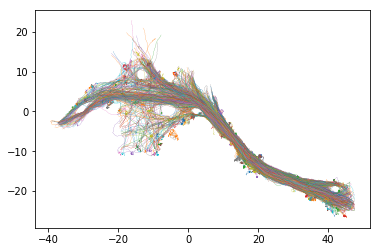

In [4]:
# 轨迹可视化
import matplotlib.pyplot as plt

tr_num = length//POINTS_NUM_PER_TR
for i in np.arange(tr_num):
    x = data[i][:POINTS_NUM_PER_TR]
    y = data[i][POINTS_NUM_PER_TR:]
    plt.plot(x,y,linewidth=0.2)
plt.show()

In [5]:
# 聚类参数确定

In [6]:
# 确定 eps
# 找到每天轨迹离它最近一条轨迹的距离，选出一个最小的距离，使得大多数轨迹在这个距离范围内能达到其他轨迹
from sklearn.neighbors import BallTree

tree = BallTree(data, leaf_size=500,metric=dist)              
dst, ind = tree.query(data, k=3) 

In [9]:
dst

array([[ 0.        ,  1.49967316,  3.09973219],
       [ 0.        ,  1.00886422,  1.23315545],
       [ 0.        ,  3.25725279,  4.01260257],
       ..., 
       [ 0.        ,  1.51343027,  1.5858035 ],
       [ 0.        ,  0.74168461,  0.80637027],
       [ 0.        ,  4.41635019,  5.30539807]])

In [11]:
hist, bin_edges = np.histogram(dst[:,2])
print(hist)
print(bin_edges)
ll = [(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

[371 224 113  81  65  49  28  22   7   8]
[ 0.60155625  1.29905262  1.99654898  2.69404535  3.39154171  4.08903808
  4.78653444  5.48403081  6.18152717  6.87902354  7.5765199 ]


In [25]:
# eps 设定

EPS = 4.78

In [26]:
# 确定 MIN_SAMPLES
# 找到每一个点在 EPS 内，包含的点数，选出一个最大的距离，使得多数轨迹都是核心点

samples_in_eps = tree.query_radius(data, r=EPS, count_only=True)

In [30]:
y, x = np.histogram(samples_in_eps,bins=100)
print(y)
print(x)

[65 59 40 39 28 17 23 10  9  7 12  8  4 13 14  9 19 12 17 16 20 20 16 16  9
 20 20 10  9  7  4  7  9  9  9  7  7  1  6  6  8  6  6  7  8  9  3 11  6  2
  5  3  2  3  4  3  1  4  5  4  7  5  2  5  5  7  6  4  3  4  3 11  7  3  1
  2  3  4  5  4 11  4  8 10 11  8 11  4  6  4  8 10  7 10  6 10  6  3  5  2]
[   1.      2.92    4.84    6.76    8.68   10.6    12.52   14.44   16.36
   18.28   20.2    22.12   24.04   25.96   27.88   29.8    31.72   33.64
   35.56   37.48   39.4    41.32   43.24   45.16   47.08   49.     50.92
   52.84   54.76   56.68   58.6    60.52   62.44   64.36   66.28   68.2
   70.12   72.04   73.96   75.88   77.8    79.72   81.64   83.56   85.48
   87.4    89.32   91.24   93.16   95.08   97.     98.92  100.84  102.76
  104.68  106.6   108.52  110.44  112.36  114.28  116.2   118.12  120.04
  121.96  123.88  125.8   127.72  129.64  131.56  133.48  135.4   137.32
  139.24  141.16  143.08  145.    146.92  148.84  150.76  152.68  154.6
  156.52  158.44  160.36  162.28  164.2 

In [31]:
# 设定 MIN_SAMPLES
MIN_SAMPLES = 3

In [32]:
clustering = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES,metric=dist).fit(data)

In [37]:
clustering.labels_

array([ 0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  0,  0,
        2,  1,  0,  0,  1,  0,  1,  8,  1,  1,  1,  1,  1,  1, -1,  0,  1,
        3,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  4,  0,  1,  0,  1,  0,
        0,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,
       -1,  0,  0,  0,  1,  1, -1,  8,  1, -1, -1,  1,  1,  0,  1,  1,  1,
        0,  0,  1,  1,  1,  0,  1,  1,  1,  1, -1,  0,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1,  1,  0,  1, -1, -1,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  0, -1,  1,  1,  1,  1,  0,  1, -1,  0,  1,  1,  1,  1,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  0,
        0,  0,  1,  0, -1,  0,  1,  1,  1,  1,  0,  0, -1,  1,  0,  0,  1,
        1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  5,  1,  1,  0,  1,  0,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1, -1,  4,  9, -1,  1,  0,
        0,  0,  0,  0, -1

In [ ]:
# 验证距离的有效性

In [ ]:
# BallTree